In [1]:
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from sklearn.linear_model import LinearRegression
import numpy as np
from sklearn.metrics import r2_score

In [9]:
plt.style.use('seaborn')

In [2]:
x, y, z = [1,4], [1,6], [1,5]
x1, y1, z1 = [1,4], [1,6], [1,1]
x2, y2, z2 = [4,4], [6,6], [1,5]
x3, y3, z3 = [1,4], [1,1], [1,1]
x4, y4, z4 = [4,4], [1,6], [1,1]

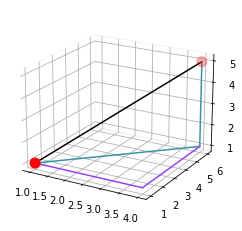

In [12]:
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.scatter(x,y,z, color = 'red', s= 100)
ax.xaxis.pane.fill = False
ax.yaxis.pane.fill = False
ax.zaxis.pane.fill = False
# ax.grid(False)

# Hide axes ticks
# ax.set_xticks([])
# ax.set_yticks([])
# ax.set_zticks([])
ax.plot(x,y,z, color = 'black')
ax.plot(x1, y1, z1, color = '#3794ab')
ax.plot(x2, y2, z2, color = '#3794ab')
ax.plot(x3, y3, z3, color = '#9942f5')
ax.plot(x4, y4, z4, color = '#9942f5')
ax.view_init(elev=20)
# plt.show()
# Axes3D.plot()
plt.savefig('euclideandistance.png', dpi = 300)


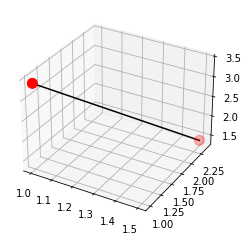

In [7]:
fig = plt.figure()
ax = fig.add_subplot(projection="3d")
x, y, z = [1, 1.5], [1, 2.4], [3.4, 1.4]
ax.scatter(x, y, z, c='red', s=100)
ax.plot(x, y, z, color='black')
plt.show()

# Camera to Real World Coordinates Map

## Y Direction

In [21]:
y_mm = [110, 135, 160, 185, 210, 235, 260, 285, 310, 335, 360, 385, 410, 435, 460, 485 ,510]
y_pixel = [32, 97, 161, 226, 290, 353, 416, 478, 543, 604, 667, 729, 793, 857, 919, 984, 1047]

In [22]:
coeff = np.polyfit(y_pixel, y_mm, 1)
poly1d_fn = np.poly1d(coeff) 

In [23]:
r2 = r2_score(y_mm, poly1d_fn(y_pixel))
# r2

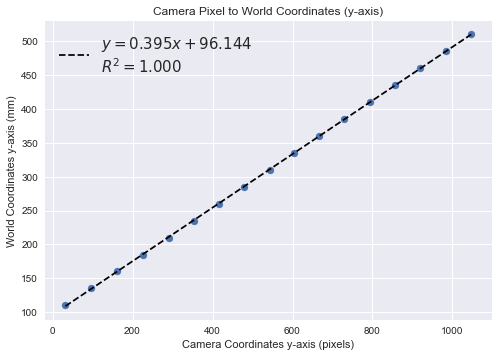

In [24]:
fig, ax = plt.subplots()
ax.scatter(y_pixel, y_mm)
ax.plot(y_pixel, poly1d_fn(y_pixel), '--k', label = r'$y={:.3f}x+{:.3f}$'.format(coeff[0],coeff[1]) + 
        '\n' + r'$R^2 = {:.3f}$'.format(r2))
ax.set_xlabel('Camera Coordinates y-axis (pixels)')
ax.set_ylabel('World Coordinates y-axis (mm)')
plt.legend(fontsize = 15)
ax.set_title('Camera Pixel to World Coordinates (y-axis)')
plt.savefig('ypixel2world.png', dpi = 600)

In [29]:
coeff

array([ 0.395341  , 96.14377577])

In [25]:
x_mm = [-240, -215, -190, -165, -140, -115, -90, -65, -40, -15, 10, 35, 60, 85, 110, 135, 160, 185, 210, 235, 260]
x_pixel = [1896, 1843, 1770, 1710, 1644, 1580, 1516, 1451, 1322, 1257, 1194, 1131, 1069, 1006, 944, 881, 820, 758, 695, 632, 569]

In [26]:
coeff = np.polyfit(x_pixel, x_mm, 1)
poly1d_fn = np.poly1d(coeff)
r2 = r2_score(x_mm, poly1d_fn(x_pixel))

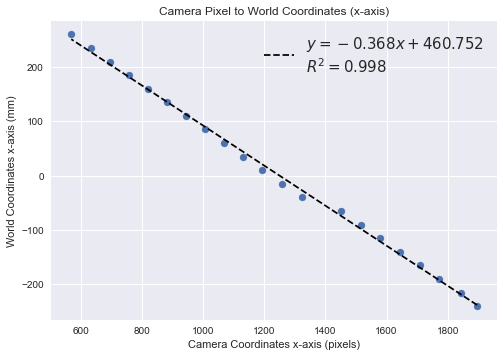

In [27]:
fig, ax = plt.subplots()
ax.scatter(x_pixel, x_mm)
ax.plot(x_pixel, poly1d_fn(x_pixel), '--k', label = r'$y={:.3f}x+{:.3f}$'.format(coeff[0],coeff[1]) + 
        '\n' + r'$R^2 = {:.3f}$'.format(r2))
ax.set_xlabel('Camera Coordinates x-axis (pixels)')
ax.set_ylabel('World Coordinates x-axis (mm)')
plt.legend(fontsize = 15)
ax.set_title('Camera Pixel to World Coordinates (x-axis)')
plt.savefig('xpixel2world.png', dpi = 600)

# Image Processing

In [1]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

In [38]:
img = cv2.imread('./Images/bluelego.jpg')
img_rgb = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
img_hsv = cv2.cvtColor(img, cv2.COLOR_BGR2HSV)

In [48]:
# cv2.imwrite('./hsv_converted.png', img_hsv)

True

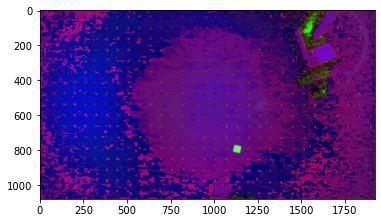

In [44]:
plt.imshow(img_hsv, cmap = 'hsv')

In [50]:
hsvRange = np.array([[85, 162, 0], [179, 255, 255]])
mask = cv2.inRange(img_hsv, hsvRange[0], hsvRange[1])
hsv_masked = cv2.bitwise_and(img_hsv, img_hsv, mask = mask)
# plt.imshow(hsv_masked, cmap = 'hsv')
cv2.imwrite('./Images/hsv_masked.png', hsv_masked)

True

In [51]:
import coordinatestransformation as ct
import colourclassification as cc

In [54]:
def getContours(img, imgContours):
    contours, hierarchy = cv2.findContours(img, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_NONE)
    # cv2.drawContours(imgContours, contours, -1, (150, 0, 150), 3)
    return contours

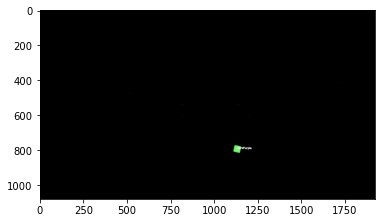

In [55]:
imgContours = hsv_masked.copy()
imgBlur = cv2.GaussianBlur(hsv_masked, (7,7), 1)
imgGray = cv2.cvtColor(imgBlur, cv2.COLOR_BGR2GRAY)

threshold1 = 55
threshold2 = 131

imgCanny = cv2.Canny(imgGray, threshold1, threshold2)
# kernel = np.ones((5,5))
imgDil = cv2.dilate(imgCanny, np.ones((5,5)), iterations = 1)

contours = getContours(imgDil, imgContours)

for c in contours:
    # if 1200  < cv2.contourArea(c) < 1500:
    if cv2.contourArea(c) > 200:
        # print(cv2.contourArea(c))
        M = cv2.moments(c)
        cX = int((M["m10"] / M["m00"]))
        cY = int((M["m01"] / M["m00"]))

        # print(cX, cY)
        pixel = img[cY, cX, :]

        cYmm = round(ct.y_mm(cY))
        cXmm = round(ct.x_mm(cX))
        # cYcm = cY * cm2pixel
        # cXcm = cX * cm2pixel
        # position = np.array([cXcm, cYcm, 0, 1])[np.newaxis].T
        # coordsBaseFrame = transformation @ position
        # x = math.floor(coordsBaseFrame[0] * 10) 
        # y = math.floor(coordsBaseFrame[1] * 10)
        # print(pixel)
        cv2.circle(img, center = (cX, cY), radius = 2, color = (0,0,0), lineType = 10)
        colour = cc.get_colour(pixel)

        # lego.update(colour, coordsBaseFrame)
        # pick_lego()

        cv2.rectangle(img, pt1 = (cX - 40, cY-40), pt2 = (cX + 40, cY +40), color = (52, 235, 164), thickness = 1)
        cv2.putText(img, colour, (cX, cY), cv2.FONT_HERSHEY_SIMPLEX, 0.5, (52, 235, 164), 2)
        cv2.putText(img, str(cXmm), (cX, cY + 20), cv2.FONT_HERSHEY_SIMPLEX, 0.5, (52, 235, 164), 2)
        cv2.putText(img, str(cYmm), (cX, cY + 40), cv2.FONT_HERSHEY_SIMPLEX, 0.5, (52, 235, 164), 2)
        cv2.putText(imgContours, colour, (cX, cY), cv2.FONT_HERSHEY_SIMPLEX, 0.5, (255, 255, 255), 2)

# plt.imshow(imgContours)

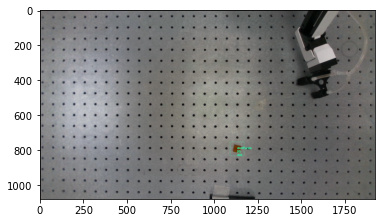

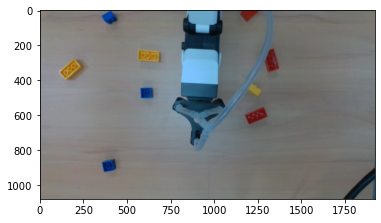

In [12]:
plt.imshow(img_rgb)
# plt.show()

# Colours

In [1]:
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

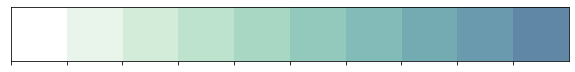

In [65]:
p = sns.cubehelix_palette(start = 0.5, rot=-.55, dark = 0.5, light = 1, n_colors = 10, hue = 0.8)
sns.palplot(p)

In [66]:
print(p.as_hex())

['#ffffff', '#eaf6eb', '#d4ecda', '#bde2ce', '#a8d7c4', '#93cabd', '#83bbb8', '#74acb3', '#699bae', '#6089a7']
